# Final Project Telco Customer Churn
### Created by: Jonathan Odilo, Andreas Michael Stannulimdra

__Business Problem Understanding__

Churn pada industri telekomunikasi merupakan keadaan dimana pelanggan tidak memperbaharui atau membatalkan penggunaan layanan dari provider telekomunikasi. Churning memiliki dampak negatif yang cukup besar kepada perusahaan. Penurunan jumlah pelanggan akan menurunkan revenue perusahaan dan memperburuk citra perusahaan kepada masyarakat. Pada sisi lain, biaya yang dikeluarkan untuk menarik pelanggan lebih besar dibandingkan untuk mempertahankan pelanggan. Data yang dipublikasikan sebelumnya mengindikasikan bahwa Churning rate pada industri telekomunikasi berkisar pada 21-31% (Tessitore S, 2025).

__Problem Statement__

Telco adalah penyedia layanan telepon dan internet yang berasal dari Negara Bagian California di Amerika Serikat. Saat ini Telco dihadapkan dengan permasalahan banyaknya pelanggan yang berhenti menggunakan layanan yang disediakan perusahaan ini. Telco menginginkan pelangannya untuk tetap setia menggunakan produk yang tersedia. Oleh karena itu, Telco mengekstrak data pelanggan untuk memecahkan masalah ini. Data awal menunjukkan bahwa Churn Rate pada Telco mencapai 26,5%. Berbagai alasan dikemukan oleh mantan pelanggan seperti customer support yang buruk, value yang lebih baik dari kompetitor, dan masalah jaringan.

__Goals__

Telco ingin membuat sebuah model prediksi karakteristik pelanggan seperti apa saja yang dapat membuat pelanggan memutuskan langganannya. Selain itu, identifikasi dari faktor apa saja yang menyebabkan pelanggan memutuskan berhenti berlangganan akan menjadi insight kepada Telco dan mempersiapkan strategi untuk mempertahankan pelanggan pada pasien.

__Analytic Approach__

Akan dilakukan analisis data mulai dari preprocessing, exploratory data analysis, dan inferential data analysis. Setelah itu akan dilakukan pendekatan machine learning untuk mendapatkan klasifikasi churn/tidak churn.

__Metric Evaluation__

Evaluasi metrik menggunakan ROC/AUC, Recall, Precision, dan F1 score. Dataset untuk training dialokasikan 80% dan untuk testing 20%.

__Eksklusi Data/Limitasi Model__

Pada data ini, akan dieksklusi:
- Pelanggan yang tidak berlangganan layanan telepon
- Pelanggan yang menjawab tidak tahu pada alasan Churning
- Pelanggan yang Churning karena meninggal


In [385]:
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Import Statistics
import scipy.stats as stats

In [267]:
df = pd.read_excel('Telco_customer_churn.xlsx')
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [268]:
# Konversi Total Charges ke numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Isi missing value Total Charges dengan median
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)

# Cek data setelah perbaikan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\288952873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


In [269]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [270]:
pd.set_option('display.max_colwidth', 0)

listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,CustomerID,7043,"[3668-QPYBK, 9237-HQITU, 9305-CDSKC, 7892-POOKP, 0280-XJGEX, 4190-MFLUW, 8779-QRDMV, 1066-JKSGK, 6467-CHFZW, 8665-UTDHZ, 8773-HHUOZ, 6047-YHPVI, 5380-WJKOV, 8168-UQWWF, 7760-OYPDY, 9420-LOJKX, 7495-OOKFY, 1658-BYGOY, 5698-BQJOH, 5919-TMRGD, 9191-MYQKX, 8637-XJIVR, 0278-YXOOG, 4598-XLKNJ, 3192-NQECA, 0486-HECZI, 4846-WHAFZ, 5299-RULOA, 0404-SWRVG, 4412-YLTKF, 6207-WIOLX, 3091-FYHKI, 2372-HWUHI, 0390-DCFDQ, 4080-OGPJL, 2135-RXIHG, 3874-EQOEP, 0867-MKZVY, 3376-BMGFE, 3445-HXXGF, 1875-QIVME, 0691-JVSYA, 2656-FMOKZ, 2070-FNEXE, 6317-YPKDH, 9367-WXLCH, 1918-ZBFQJ, 1024-GUALD, 2472-OVKUP, 1285-OKIPP, 7825-ECJRF, 7841-TZDMQ, 9408-SSNVZ, 0742-MOABM, 2232-DMLXU, 8937-RDTHP, 1251-KRREG, 0094-OIFMO, 9947-OTFQU, 0322-YINQP, 4629-NRXKX, 9514-JDSKI, 4959-JOSRX, 7273-TEFQD, 3606-TWKGI, 6323-AYBRX, 4385-GZQXV, 6366-ZGQGL, 5940-AHUHD, 6432-TWQLB, 4484-GLZOU, 9512-UIBFX, 5583-SXDAG, 3488-PGMQJ, 3580-REOAC, 7534-BFESC, 6390-DSAZX, 8098-LLAZX, 0265-EDXBD, 7563-BIUPC, 2321-OMBXY, 2840-XANRC, 5020-ZSTTY, 5804-LEPIM, 0122-OAHPZ, 2868-SNELZ, 4322-RCYMT, 6680-NENYN, 1343-EHPYB, 2034-GDRCN, 0219-YTZUE, 0623-IIHUG, 4572-DVCGN, 9057-MSWCO, 1010-DIAUQ, 0259-GBZSH, 9601-BRXPO, 6905-NIQIN, 5167-ZFFMM, 4895-TMWIR, ...]"
1,Count,1,[1]
2,Country,1,[United States]
3,State,1,[California]
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, Lynwood, Marina Del Rey, Inglewood, Santa Monica, Torrance, Whittier, La Habra, Pico Rivera, Avalon, Harbor City, Lakewood, Los Alamitos, San Pedro, Carson, Long Beach, Altadena, Monrovia, Sierra Madre, Tujunga, Pasadena, Glendale, Canoga Park, Mission Hills, Santa Clarita, Sun Valley, Stevenson Ranch, Panorama City, Van Nuys, Burbank, North Hollywood, Covina, El Monte, La Puente, Rowland Heights, Ontario, Pomona, Rosemead, San Dimas, West Covina, Alhambra, Alpine, Bonita, Boulevard, Guatay, Jacumba, Mount Laguna, Borrego Springs, Carlsbad, Del Mar, El Cajon, Escondido, Oceanside, Pala, Palomar Mountain, Pauma Valley, Ranchita, Valley Center, San Diego, Indio, Indian Wells, Palm Desert, Desert Hot Springs, Holtville, Niland, North Palm Springs, Ocotillo, Seeley, Thermal, Adelanto, Apple Valley, Crestline, Daggett, Ludlow, Lucerne Valley, Lytle Creek, Phelan, Redlands, Rialto, Running Springs, Tecopa, Victorville, Wrightwood, San Bernardino, Riverside, March Air Reserve Base, Hemet, Homeland, Idyllwild, Moreno Valley, Murrieta, Perris, Sun City, Irvine, Lake Forest, Huntington Beach, Newport Beach, Santa Ana, ...]"
5,Zip Code,1652,"[90003, 90005, 90006, 90010, 90015, 90020, 90022, 90024, 90028, 90029, 90032, 90039, 90041, 90042, 90056, 90061, 90063, 90065, 90211, 90255, 90262, 90292, 90301, 90303, 90403, 90504, 90602, 90606, 90631, 90660, 90704, 90710, 90712, 90720, 90731, 90745, 90804, 91001, 91016, 91024, 91042, 91103, 91106, 91107, 91202, 91204, 91206, 91207, 91304, 91345, 91350, 91352, 91381, 91402, 91411, 91504, 91601, 91605, 91722, 91723, 91731, 91732, 91744, 91746, 91748, 91762, 91764, 91766, 91768, 91770, 91773, 91791, 91803, 91901, 91902, 91905, 91931, 91934, 91948, 92004, 92009, 92014, 92020, 92029, 92057, 92059, 92060, 92061, 92066, 92082, 92103, 92104, 92105, 92108, 92116, 92122, 92129, 92154, 92201, 92210, ...]"
6,Lat Long,1652,"[33.964131, -118.272783, 34.059281, -118.30742, 34.048013, -118.293953, 34.062125, -118.315709, 34.039224, -118.266293, 34.066367, -118.309868, 34.02381, -118.156582, 34.066303, -118.435479, 34.099869, -118.326843, 34.089953, -118.294824, 34.078821, -118.177576, 34.110845, -118.259595, 34.137412, -118.207607, 34.11572, -118.192754, 33.987945, -118.370442, 33.92128, -118.274186, 34.044271, -118.185237, 34.108833, -118.229715, 34.063947, -118.383001, 33.97803, -118.217141, 33.923573, -118.200669, 33.977468, -118.445475, 33.956445, -118.358634, 33.936291, -118.332639, 34.031529, -118.491156, 33.867257, -118.330794, 33.972119, -118.020188, 33.976678, -118.065875, 33.940619, -117.9513, 33.989524, -118.089299, 33.391181, -118.421

__Tidak ada missing data, lanjut Exploratory Data Analysis__

In [271]:
df.describe()

,Count,Zip Code,Latitude,Longitude,Tenure Months,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV
count,7043.0,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.0,93521.964646,36.282441,-119.798880,32.371149,64.761692,2281.916928,0.265370,58.699418,4400.295755
std,0.0,1865.794555,2.455723,2.157889,24.559481,30.090047,2265.270398,0.441561,21.525131,1183.057152
min,1.0,90001.000000,32.555828,-124.301372,0.000000,18.250000,18.800000,0.000000,5.000000,2003.000000
25%,1.0,92102.000000,34.030915,-121.815412,9.000000,35.500000,402.225000,0.000000,40.000000,3469.000000
50%,1.0,93552.000000,36.391777,-119.730885,29.000000,70.350000,1397.475000,0.000000,61.000000,4527.000000
75%,1.0,95351.000000,38.224869,-118.043237,55.000000,89.850000,3786.600000,1.000000,75.000000,5380.500000
max,1.0,96161.000000,41.962127,-114.192901,72.000000,118.750000,8684.800000,1.000000,100.000000,6500.000000


In [272]:
df.describe(include=['O'])

,CustomerID,Country,State,City,Lat Long,Gender,Senior Citizen,Partner,Dependents,Phone Service,...,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Churn Label,Churn Reason
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043,7043,1869
unique,7043,1,1,1129,1652,2,2,2,2,2,...,3,3,3,3,3,3,2,4,2,20
top,3668-QPYBK,United States,California,Los Angeles,"33.964131, -118.272783",Male,No,No,No,Yes,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,No,Attitude of support person
freq,1,7043,7043,305,5,3555,5901,3641,5416,6361,...,3088,3095,3473,2810,2785,3875,4171,2365,5174,192


In [294]:
# Eksklusi data No phone service
indices_to_drop = df[df["Multiple Lines"] == "No phone service"].index
df.drop(indices_to_drop, inplace =True)

# Mengganti nilai 'No internet service'/'No phone service' menjadi 'No' untuk fitur yang sama dengan 'No'
internet_features = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies']
for col in internet_features:
    df[col] = df[col].replace('No internet service', 'No')

In [311]:
# Eksklusi data Churn Reason Deceased, Moved dan Don't know

indices_to_drop = df[df["Churn Reason"] == "Deceased"].index
df.drop(indices_to_drop, inplace =True)

indices_to_drop = df[df["Churn Reason"] == "Don't know"].index
df.drop(indices_to_drop, inplace =True)

indices_to_drop = df[df["Churn Reason"] == "Moved"].index
df.drop(indices_to_drop, inplace =True)

df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Category
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Competition
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,Competition
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds,Competition
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer,Competition
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,...,Yes,Bank transfer (automatic),78.70,1495.10,No,0,20,2464,NaN,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN,NaN


In [312]:
# Konversi Total Charges ke numeric
df["Total Charges"] = pd.to_numeric(df["Total Charges"], errors="coerce")

# Isi missing value Total Charges dengan median
df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)

# Cek data setelah perbaikan
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6168 entries, 0 to 7042
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         6168 non-null   object 
 1   Count              6168 non-null   int64  
 2   Country            6168 non-null   object 
 3   State              6168 non-null   object 
 4   City               6168 non-null   object 
 5   Zip Code           6168 non-null   int64  
 6   Lat Long           6168 non-null   object 
 7   Latitude           6168 non-null   float64
 8   Longitude          6168 non-null   float64
 9   Gender             6168 non-null   object 
 10  Senior Citizen     6168 non-null   object 
 11  Partner            6168 non-null   object 
 12  Dependents         6168 non-null   object 
 13  Tenure Months      6168 non-null   int64  
 14  Phone Service      6168 non-null   object 
 15  Multiple Lines     6168 non-null   object 
 16  Internet Service   6168 non-n

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\288952873.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Total Charges"].fillna(df["Total Charges"].median(), inplace=True)


In [313]:
def outlier_bounds(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

outlier_counts = {}

cols_to_plot = ['Tenure Months', 'Monthly Charges', 'Total Charges']

for col in cols_to_plot:
    lower, upper = outlier_bounds(df[col])
    lower_outliers = (df[col] < lower).sum()
    upper_outliers = (df[col] > upper).sum()
    total_outliers = lower_outliers + upper_outliers
    outlier_counts[col] = {
        'Lower Bound': lower,
        'Upper Bound': upper,
        'Lower Outliers': lower_outliers,
        'Upper Outliers': upper_outliers,
        'Total Outliers': total_outliers
    }

outlier_df = pd.DataFrame(outlier_counts).T
print(outlier_df)

                 Lower Bound  Upper Bound  Lower Outliers  Upper Outliers  \
Tenure Months   -61.50000     126.50000    0.0             0.0              
Monthly Charges -26.29375     161.55625    0.0             0.0              
Total Charges   -5043.92500   9561.87500   0.0             0.0              

                 Total Outliers  
Tenure Months    0.0             
Monthly Charges  0.0             
Total Charges    0.0             


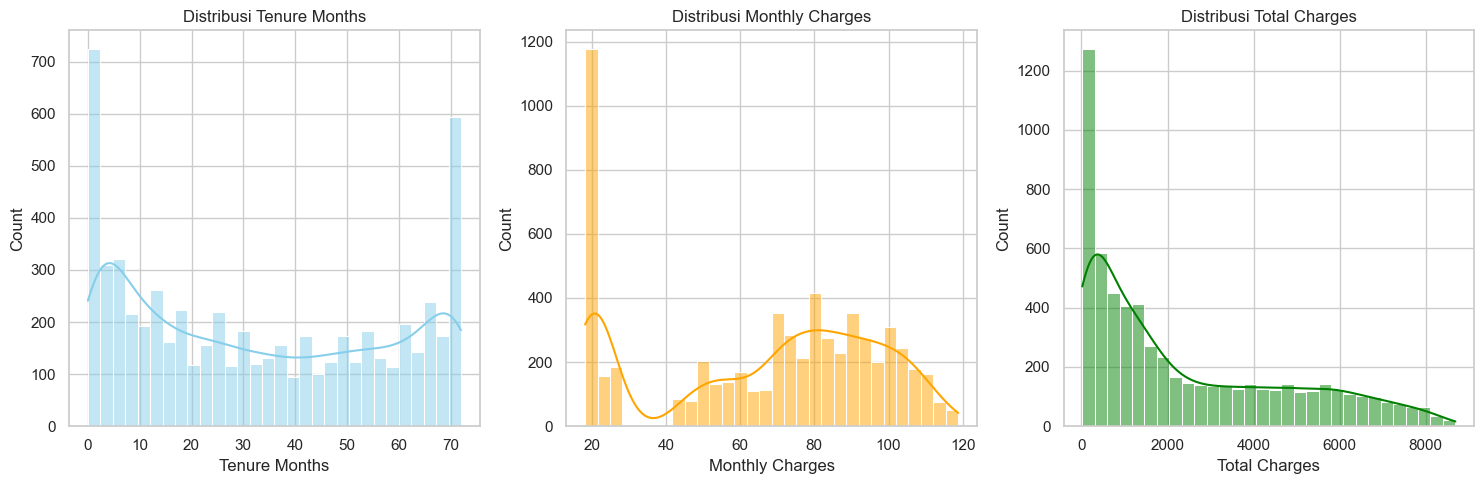

In [314]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df["Tenure Months"], kde=True, bins=30, color="skyblue")
plt.title("Distribusi Tenure Months")

plt.subplot(1,3,2)
sns.histplot(df["Monthly Charges"], kde=True, bins=30, color="orange")
plt.title("Distribusi Monthly Charges")

plt.subplot(1,3,3)
sns.histplot(df["Total Charges"], kde=True, bins=30, color="green")
plt.title("Distribusi Total Charges")

plt.tight_layout()
plt.show()


In [315]:
statistic, pvalue = stats.normaltest(df['Tenure Months'])
print('Tenure Months normality test: ')
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

Tenure Months normality test: 
Statistic: 57452.12026055068
P-value: 0.0


In [316]:
grouped_dataTM1 = df['Tenure Months'][df['Churn Label'] == 'Yes']
grouped_dataTM2 = df['Tenure Months'][df['Churn Label'] == 'No']

U_statistic, p_value = stats.mannwhitneyu(grouped_dataTM1, grouped_dataTM2)
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

U-statistic: 1855419.0
P-value: 3.2211640313297046e-167


In [317]:
print(grouped_dataTM1.median())
print(grouped_dataTM2.median())

10.0
38.0


In [318]:
statistic, pvalue = stats.normaltest(df['Monthly Charges'])
print('Monthly Charges normality test: ')
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

Monthly Charges normality test: 
Statistic: 4689.342587615263
P-value: 0.0


In [319]:
grouped_dataMC1 = df['Monthly Charges'][df['Churn Label'] == 'Yes']
grouped_dataMC2 = df['Monthly Charges'][df['Churn Label'] == 'No']

U_statistic, p_value = stats.mannwhitneyu(grouped_dataTM1, grouped_dataTM2)
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

U-statistic: 1855419.0
P-value: 3.2211640313297046e-167


In [320]:
print(grouped_dataMC1.median())
print(grouped_dataMC2.median())

81.0
69.85


In [321]:
statistic, pvalue = stats.normaltest(df['Total Charges'])
print('Total Charges normality test: ')
print(f"Statistic: {statistic}")
print(f"P-value: {pvalue}")

Total Charges normality test: 
Statistic: 697.8312177193114
P-value: 2.9368138683035043e-152


In [306]:
grouped_dataTC1 = df['Total Charges'][df['Churn Label'] == 'Yes']
grouped_dataTC2 = df['Total Charges'][df['Churn Label'] == 'No']

U_statistic, p_value = stats.mannwhitneyu(grouped_dataTM1, grouped_dataTM2)
print(f"U-statistic: {U_statistic}")
print(f"P-value: {p_value}")

U-statistic: 1855419.0
P-value: 3.2211640313297046e-167


In [307]:
print(grouped_dataTC1.median())
print(grouped_dataTC2.median())

789.4749999999999
1709.125


C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


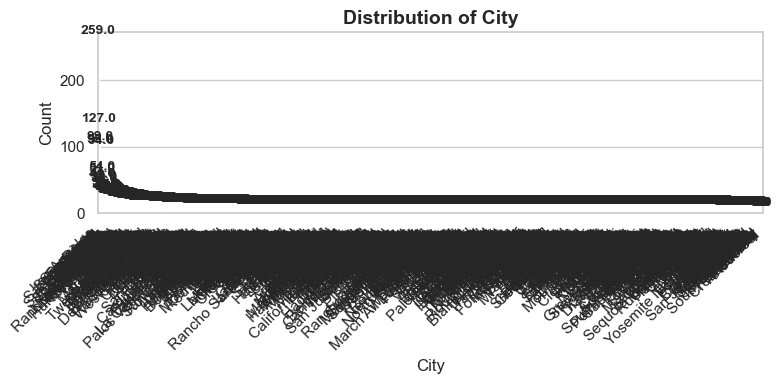

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


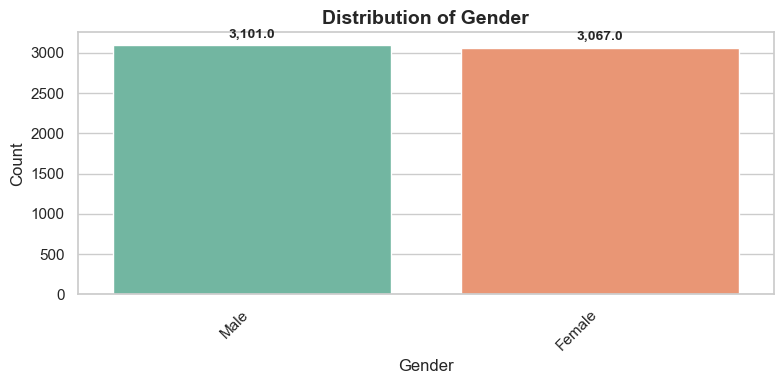

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


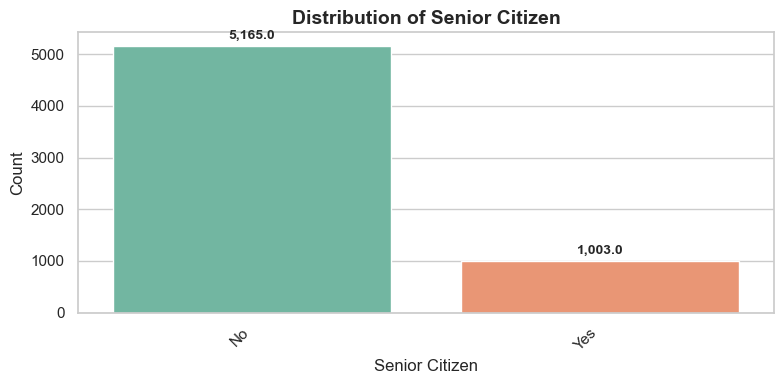

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


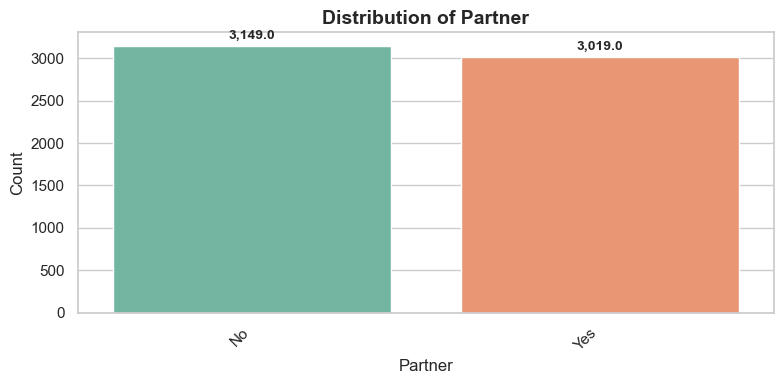

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


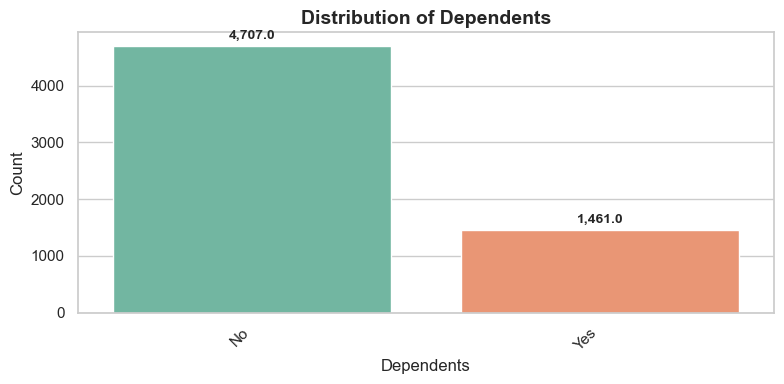

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


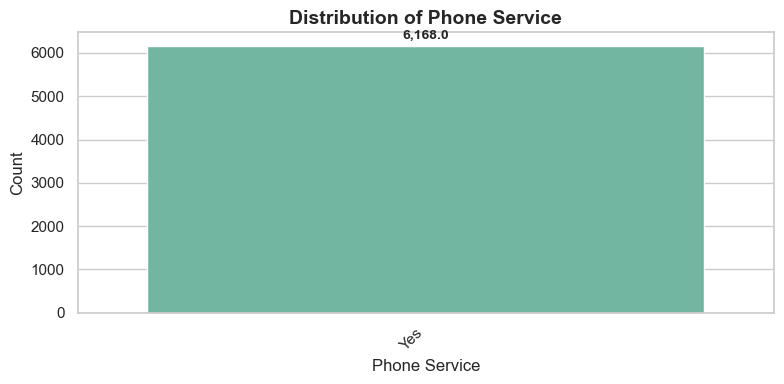

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


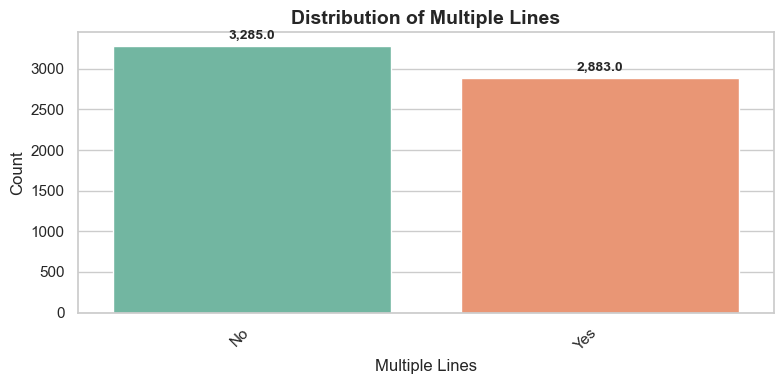

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


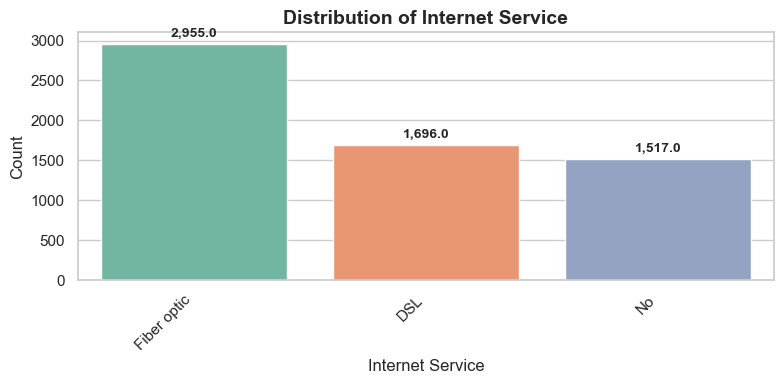

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


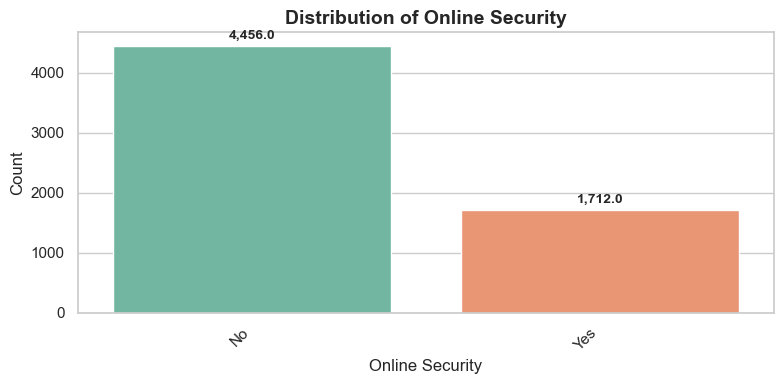

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


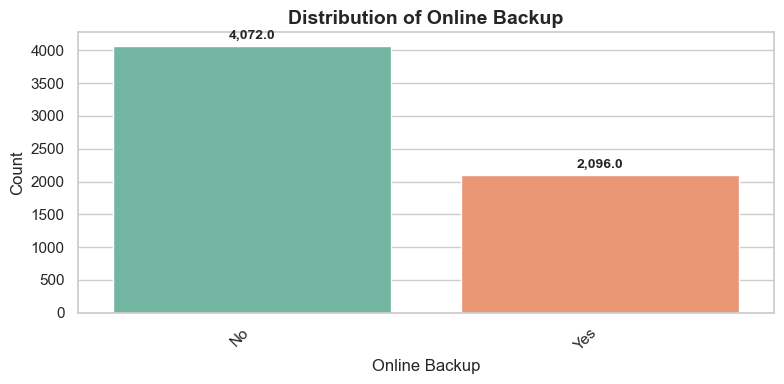

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


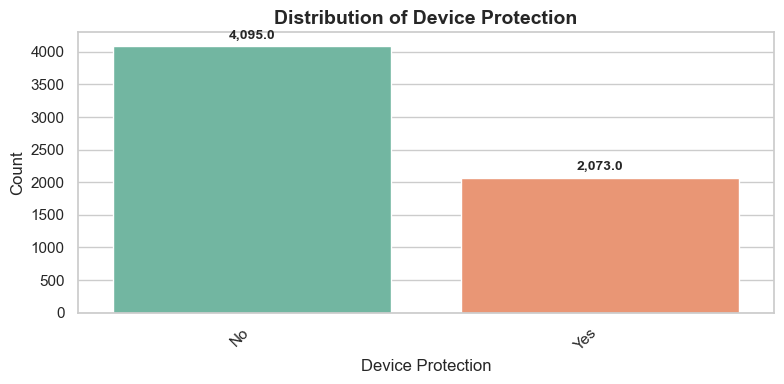

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


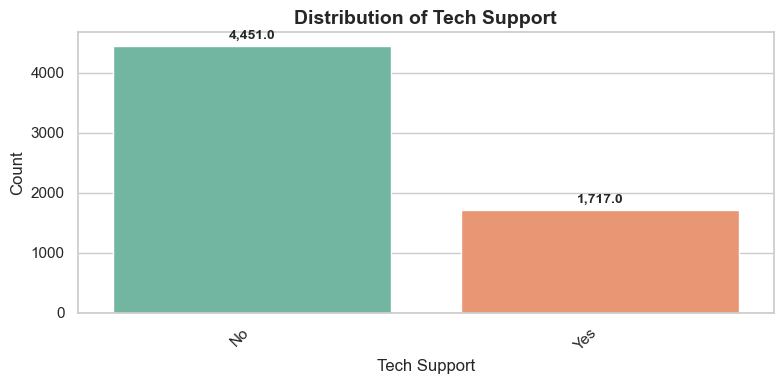

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


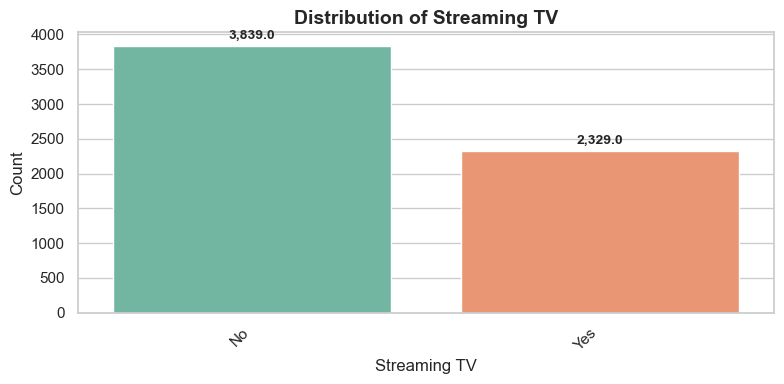

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


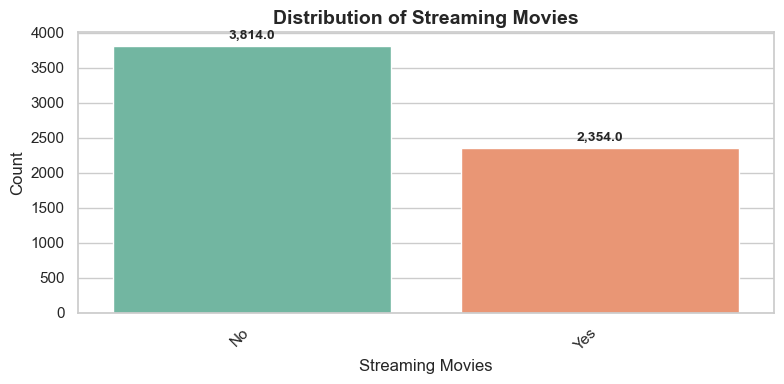

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


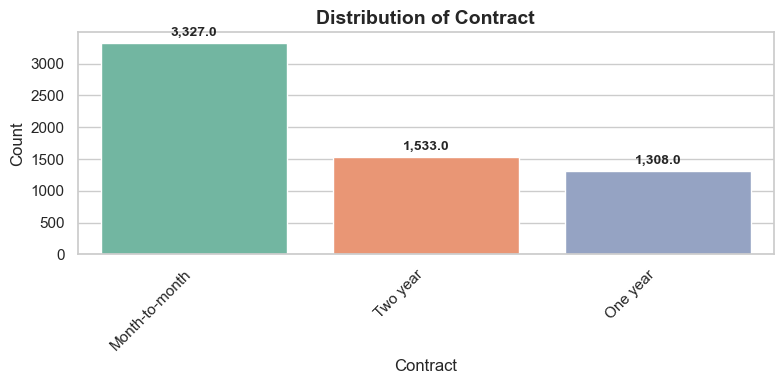

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


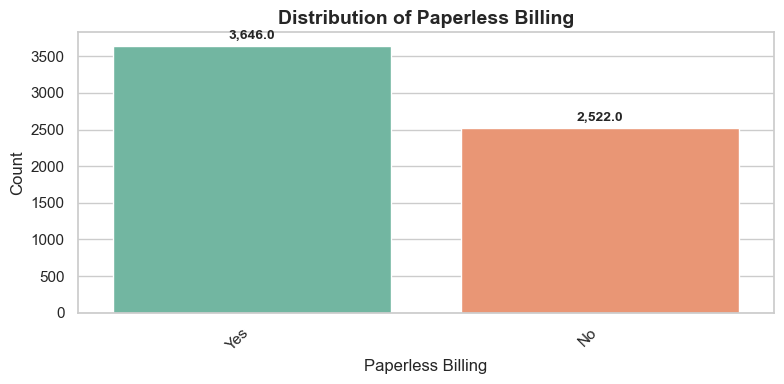

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


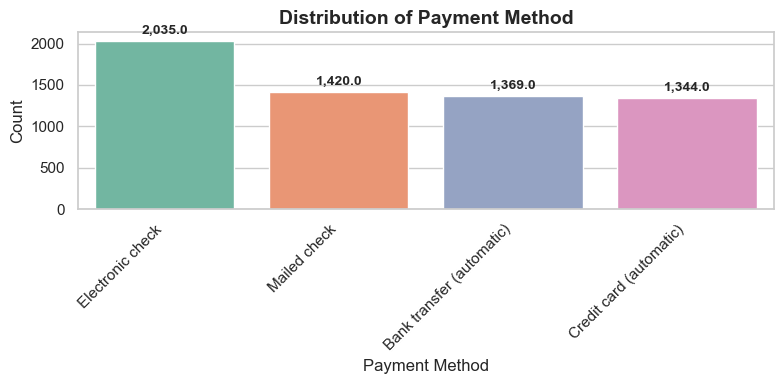

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


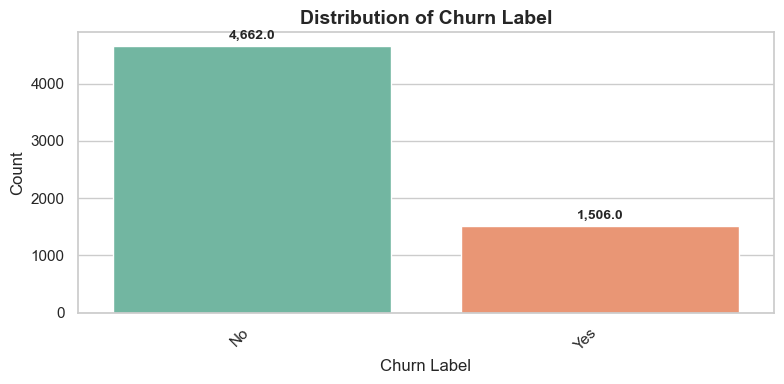

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\2426200233.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


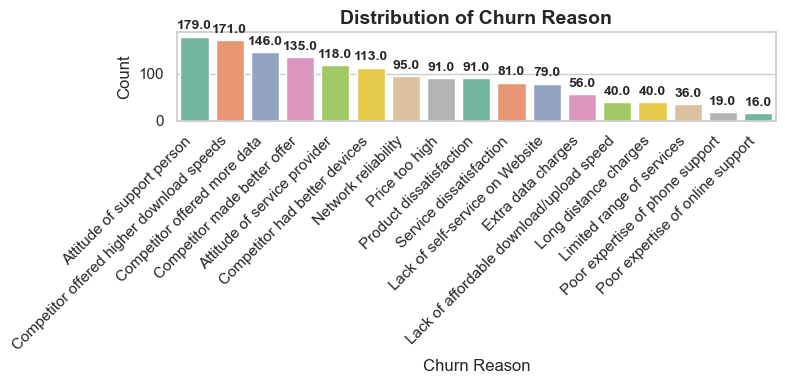

In [308]:
cat_cols = [
    'City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method', 'Churn Label', 'Churn Reason'
]

sns.set(style="whitegrid")

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=col,
        palette="Set2",
        order=df[col].value_counts().index
    )

    # Add text labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height:,}',   # format with thousands separator
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            xytext=(0, 3),  # offset in points
            textcoords='offset points'
        )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()

In [309]:
cat_cols = [
    'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Phone Service',
    'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup',
    'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
    'Contract', 'Paperless Billing', 'Payment Method'
]

results = {}

for col in cat_cols:
    
    ct = pd.crosstab(df[col], df['Churn Label'])
    
    if 'Yes' in ct.columns:
        ct['Churn %'] = (ct['Yes'] / ct.sum(axis=1) * 100).round(1)
    else:
        ct['Churn %'] = (ct[1] / ct.sum(axis=1) * 100).round(1)
        
    chi2, p, dof, expected = stats.chi2_contingency(ct)
    
    results[col] = {
        "Chi2": chi2,
        "p-value": p,
        "dof": dof
    }
    
    print(f"\n===== {col} vs Churn Label =====")
    print(ct)
    print(f"Chi2 = {chi2:.2f}, dof = {dof}, p = {p:.4f}")


===== Gender vs Churn Label =====
Churn Label    No  Yes  Churn %
Gender                         
Female       2298  769  25.1   
Male         2364  737  23.8   
Chi2 = 1.48, dof = 2, p = 0.4779

===== Senior Citizen vs Churn Label =====
Churn Label       No   Yes  Churn %
Senior Citizen                     
No              4056  1109  21.5   
Yes             606   397   39.6   
Chi2 = 248.17, dof = 2, p = 0.0000

===== Partner vs Churn Label =====
Churn Label    No  Yes  Churn %
Partner                        
No           2179  970  30.8   
Yes          2483  536  17.8   
Chi2 = 145.16, dof = 2, p = 0.0000

===== Dependents vs Churn Label =====
Churn Label    No   Yes  Churn %
Dependents                      
No           3285  1422  30.2   
Yes          1377  84    5.7    
Chi2 = 363.16, dof = 2, p = 0.0000

===== Phone Service vs Churn Label =====
Churn Label      No   Yes  Churn %
Phone Service                     
Yes            4662  1506  24.4   
Chi2 = 0.00, dof = 0, p = 1.00

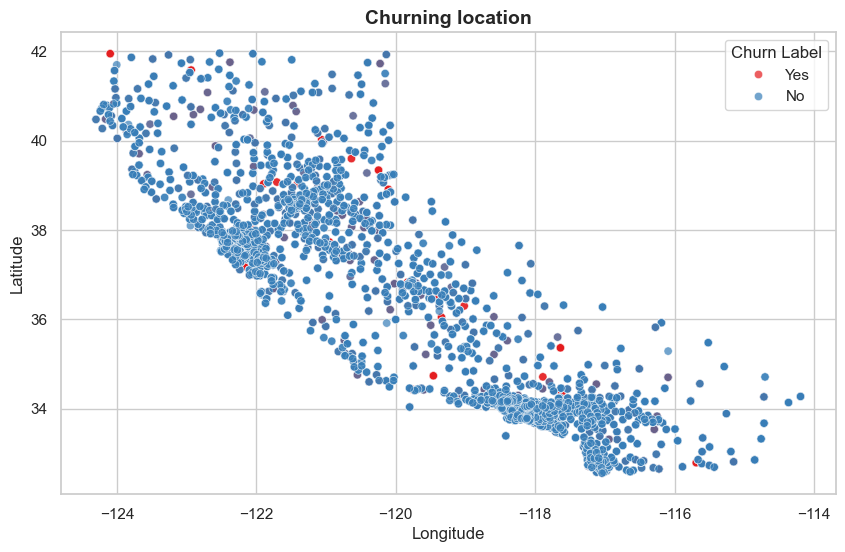

In [310]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(
    data=df,
    x="Longitude", 
    y="Latitude", 
    hue="Churn Label",
    palette="Set1",
    alpha=0.7
)
ax.set_title("Churning location", fontsize=14, fontweight="bold")
plt.show()

__Dari scatterplot koordinat pada peta, bisa dilihat tidak ada hubungan antara churning dan koordinat pelanggan__

__Dilakukan EDA pada subjek Churn dengan pengelompokkan berdasarkan alasan Churn__

- __Support-related :__
Atitude of support person, Poor expertise of phone support, Poor expertise of online support

- __Service-related :__
Attitude of service provider, Limited range of services, Lack of self-service on Website, Service dissatisfaction, Network reliability, Lack of affordable download/upload speed

- __Competition :__
Competitor offered more data, Competitor made better offer, Competitor had better devices, Competitor offered higher download speeds

- __Product-related :__
Price too high, Extra data charges, Long distance charges, Product dissatisfaction

In [322]:
support_related = [
    "Attitude of support person",
    "Poor expertise of phone support",
    "Poor expertise of online support"
]

service_related = [
    "Attitude of service provider",
    "Limited range of services",
    "Lack of self-service on Website",
    "Service dissatisfaction",
    "Network reliability",
    "Lack of affordable download/upload speed"
]

competition = [
    "Competitor offered more data",
    "Competitor made better offer",
    "Competitor had better devices",
    "Competitor offered higher download speeds"
]

product_related = [
    "Price too high",
    "Extra data charges",
    "Long distance charges",
    "Product dissatisfaction"
]

reason_map = {}
reason_map.update({r: "Support-related" for r in support_related})
reason_map.update({r: "Service-related" for r in service_related})
reason_map.update({r: "Competition" for r in competition})
reason_map.update({r: "Product-related" for r in product_related})

df["Churn Category"] = df["Churn Reason"].map(reason_map)
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Category
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Competition
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,Competition
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds,Competition
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer,Competition
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,Male,...,Yes,Bank transfer (automatic),78.70,1495.10,No,0,20,2464,NaN,NaN
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Yes,Bank transfer (automatic),21.15,1419.40,No,0,45,5306,NaN,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,Yes,Mailed check,84.80,1990.50,No,0,59,2140,NaN,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,Yes,Credit card (automatic),103.20,7362.90,No,0,71,5560,NaN,NaN


In [323]:
df['Churn Category'].unique()

array(['Competition', 'Product-related', 'Service-related',
       'Support-related', nan], dtype=object)

In [324]:
df_churnonly = df[df['Churn Label'] == 'Yes']
df_churnonly

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,Churn Category
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer,Competition
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Bank transfer (automatic),103.70,5036.30,Yes,1,89,5340,Competitor had better devices,Competition
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,Female,...,No,Credit card (automatic),55.20,528.35,Yes,1,78,5925,Competitor offered higher download speeds,Competition
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,Male,...,No,Mailed check,20.15,20.15,Yes,1,92,4832,Competitor made better offer,Competition
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,Male,...,Yes,Electronic check,99.35,4749.15,Yes,1,77,5789,Competitor had better devices,Competition
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1699-HPSBG,1,United States,California,Palm Springs,92264,"33.745746, -116.514215",33.745746,-116.514215,Male,...,Yes,Electronic check,59.80,727.80,Yes,1,69,4581,Competitor offered higher download speeds,Competition
1865,8775-CEBBJ,1,United States,California,Seeley,92273,"32.790282, -115.689559",32.790282,-115.689559,Female,...,Yes,Bank transfer (automatic),44.20,403.35,Yes,1,87,2029,Competitor offered higher download speeds,Competition
1866,6894-LFHLY,1,United States,California,Vidal,92280,"34.264124, -114.717964",34.264124,-114.717964,Male,...,Yes,Electronic check,75.75,75.75,Yes,1,97,5571,Competitor offered higher download speeds,Competition
1867,0639-TSIQW,1,United States,California,White Water,92282,"33.972293, -116.654195",33.972293,-116.654195,Female,...,Yes,Credit card (automatic),102.95,6886.25,Yes,1,70,5620,Competitor offered more data,Competition


In [325]:
df_churnonly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1506 entries, 0 to 1868
Data columns (total 34 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         1506 non-null   object 
 1   Count              1506 non-null   int64  
 2   Country            1506 non-null   object 
 3   State              1506 non-null   object 
 4   City               1506 non-null   object 
 5   Zip Code           1506 non-null   int64  
 6   Lat Long           1506 non-null   object 
 7   Latitude           1506 non-null   float64
 8   Longitude          1506 non-null   float64
 9   Gender             1506 non-null   object 
 10  Senior Citizen     1506 non-null   object 
 11  Partner            1506 non-null   object 
 12  Dependents         1506 non-null   object 
 13  Tenure Months      1506 non-null   int64  
 14  Phone Service      1506 non-null   object 
 15  Multiple Lines     1506 non-null   object 
 16  Internet Service   1506 non-n

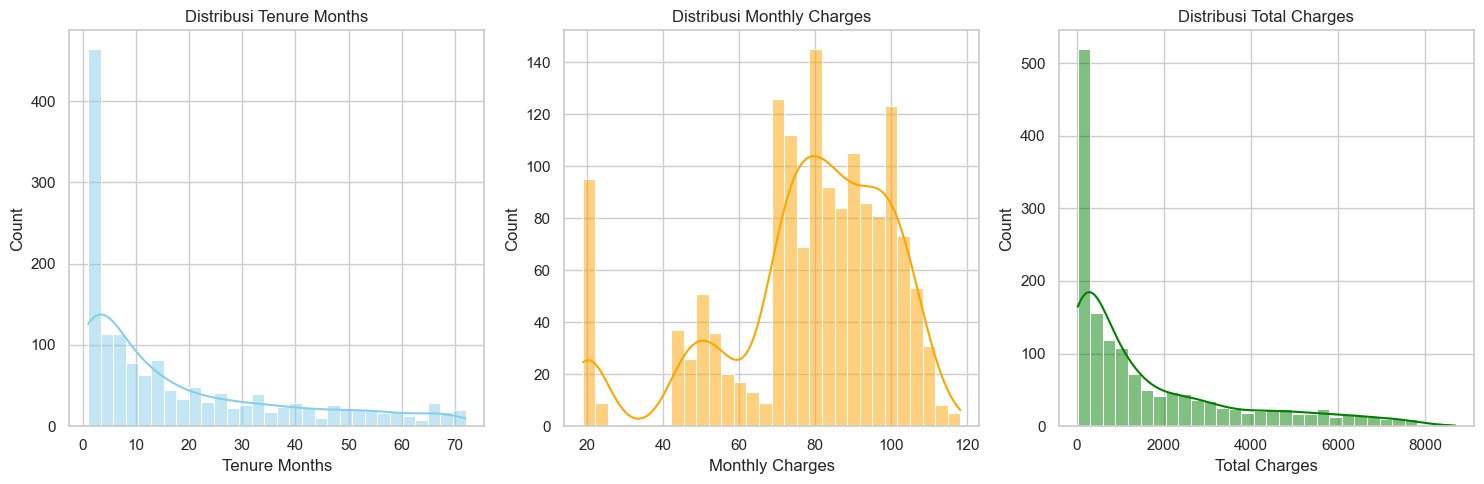

In [326]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.histplot(df_churnonly["Tenure Months"], kde=True, bins=30, color="skyblue")
plt.title("Distribusi Tenure Months")

plt.subplot(1,3,2)
sns.histplot(df_churnonly["Monthly Charges"], kde=True, bins=30, color="orange")
plt.title("Distribusi Monthly Charges")

plt.subplot(1,3,3)
sns.histplot(df_churnonly["Total Charges"], kde=True, bins=30, color="green")
plt.title("Distribusi Total Charges")

plt.tight_layout()
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


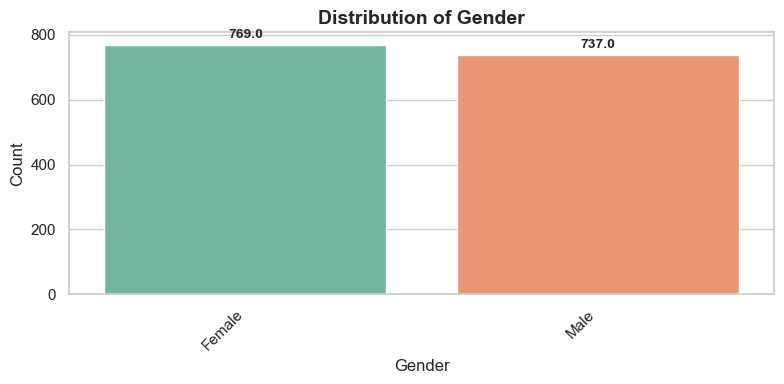

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


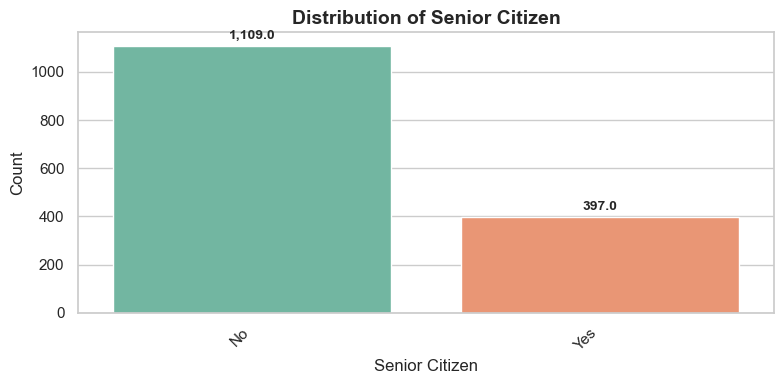

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


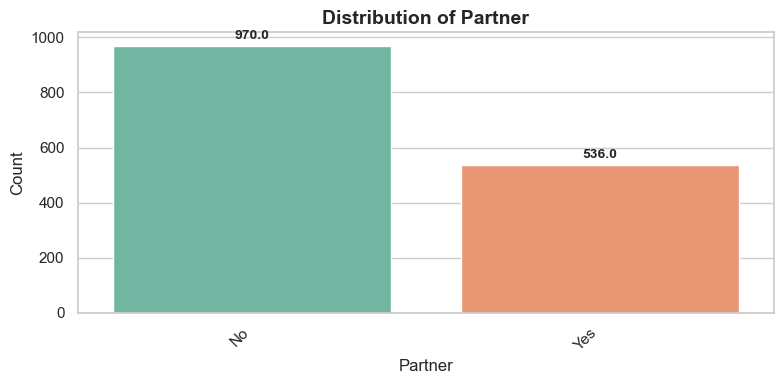

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


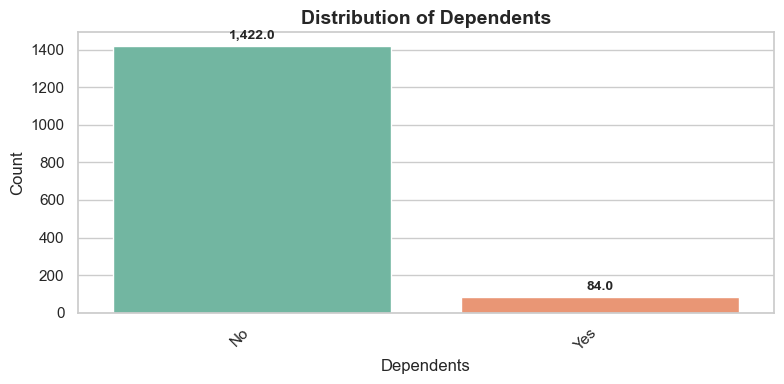

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


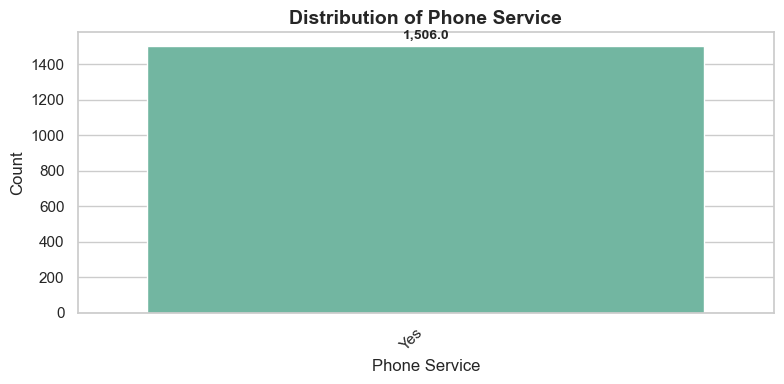

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


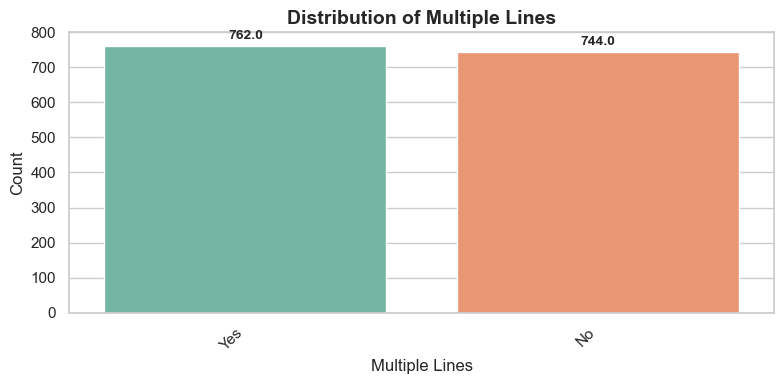

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


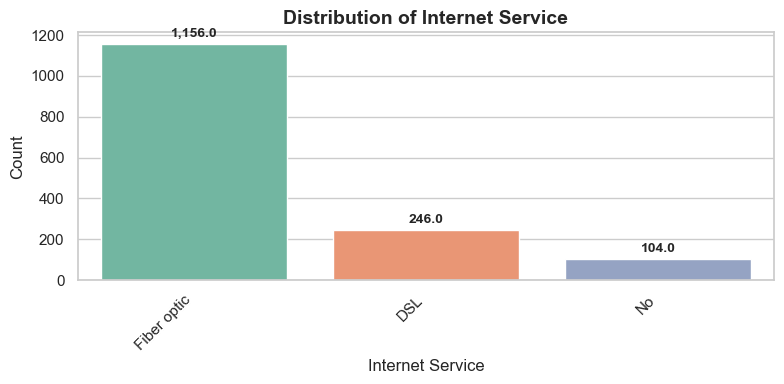

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


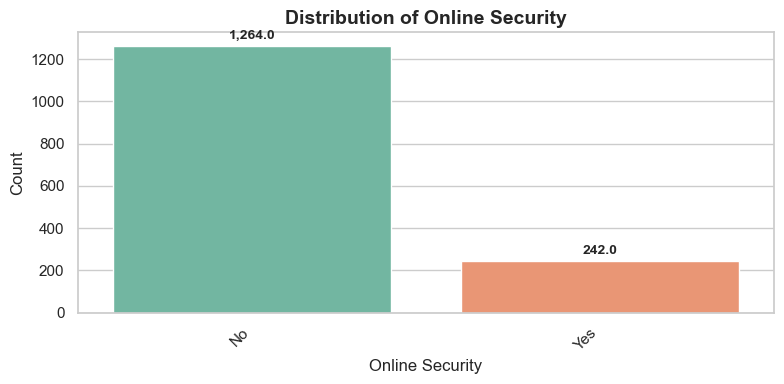

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


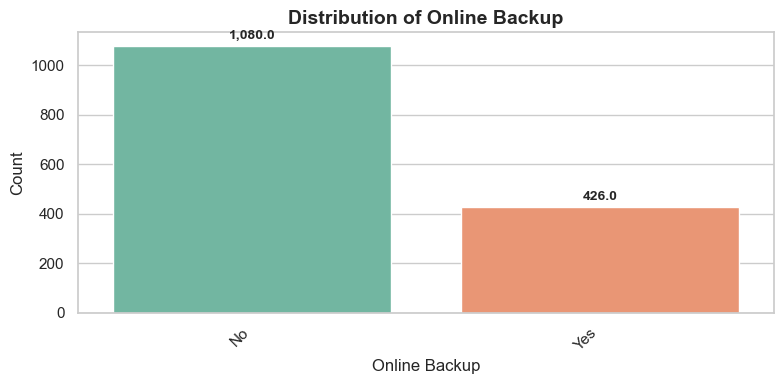

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


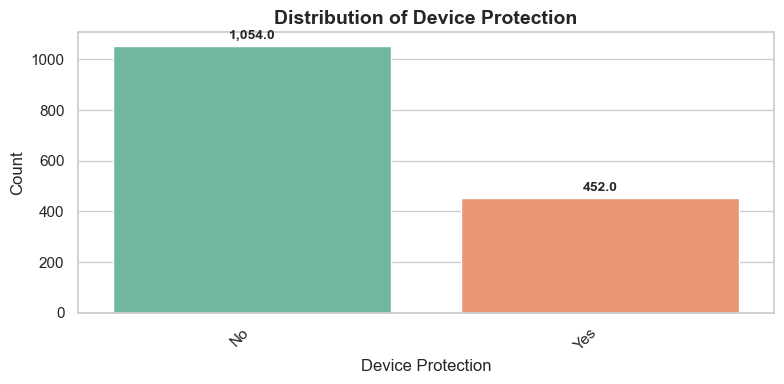

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


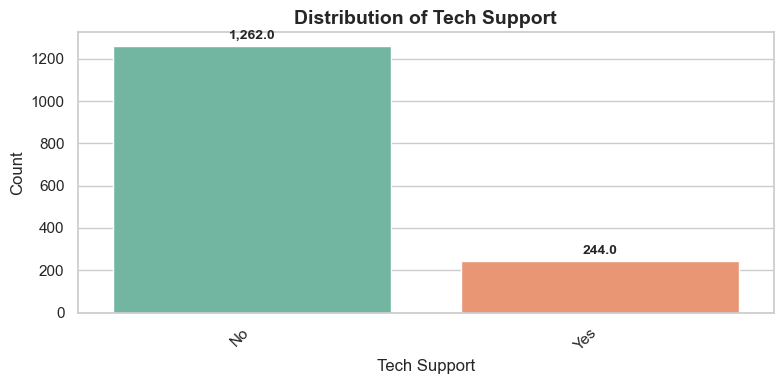

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


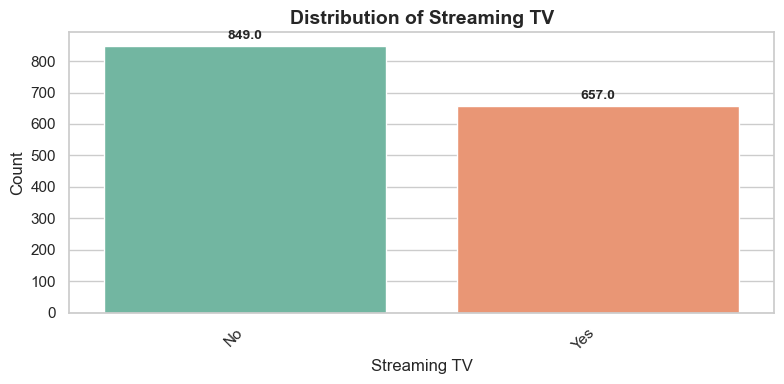

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


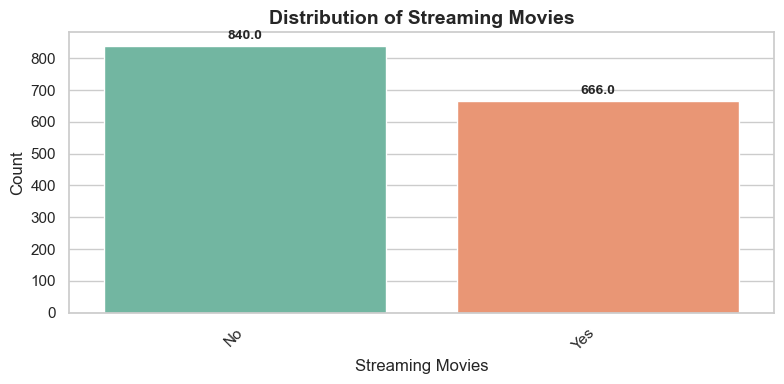

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


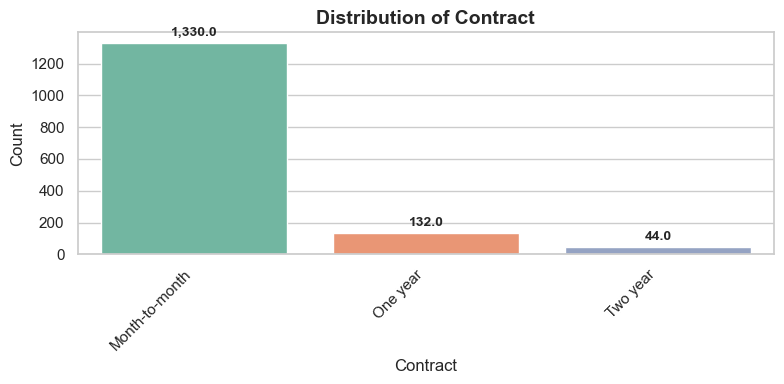

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


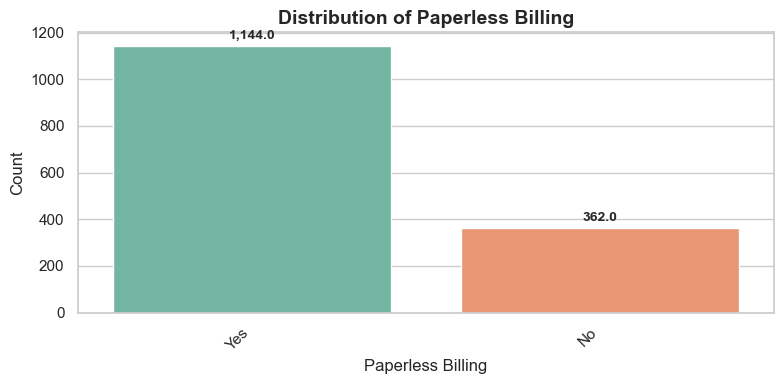

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1773778713.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


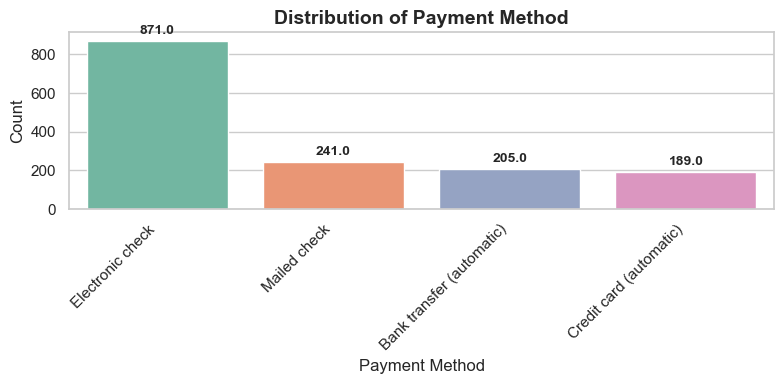

In [327]:
sns.set(style="whitegrid")

for col in cat_cols:
    plt.figure(figsize=(8, 4))
    ax = sns.countplot(
        data=df_churnonly,
        x=col,
        palette="Set2",
        order=df_churnonly[col].value_counts().index
    )

    # Add text labels on top of bars
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(
            f'{height:,}',   # format with thousands separator
            (p.get_x() + p.get_width() / 2., height),
            ha='center', va='bottom',
            fontsize=10, fontweight='bold',
            xytext=(0, 3),  # offset in points
            textcoords='offset points'
        )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight="bold")
    plt.xticks(rotation=45, ha="right")
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.tight_layout()
    plt.show()

In [328]:
results = {}

for col in cat_cols:
    
    ct1 = pd.crosstab(df_churnonly[col], df_churnonly['Churn Category'])

    chi2, p, dof, expected = stats.chi2_contingency(ct1)

    ct1_pct = (ct1.div(ct1.sum(axis=0), axis=1) * 100).round(1)
    
    results[col] = {
        "Chi2": chi2,
        "p-value": p,
        "dof": dof
    }
    
    print(f"\n===== {col} vs Churn Category =====")
    print("Counts:")
    print(ct1)
    print("\nColumn %:")
    print(ct1_pct)
    print(f"\nChi2 = {chi2:.2f}, dof = {dof}, p = {p:.4f}")


===== Gender vs Churn Category =====
Counts:
Churn Category  Competition  Product-related  Service-related  Support-related
Gender                                                                        
Female          287          143              227              112            
Male            278          135              222              102            

Column %:
Churn Category  Competition  Product-related  Service-related  Support-related
Gender                                                                        
Female          50.8         51.4             50.6             52.3           
Male            49.2         48.6             49.4             47.7           

Chi2 = 0.22, dof = 3, p = 0.9748

===== Senior Citizen vs Churn Category =====
Counts:
Churn Category  Competition  Product-related  Service-related  Support-related
Senior Citizen                                                                
No              418          190              333              16

__Determinan yang menentukan Churning pada industri Telekomunikasi__

Triyafebrianda dkk, 2022: Service quality, price satisfaction, complaint management, Multi-brand attitude

Chang dkk, 2024: Contract, Tenure, Monthly charges

Ribiero dkk, 2023: gender, age, plan, tenure, type of service

__Feature Engineering__

Diputuskan untuk menggunakan variabel:
- Gender
- Senior Citizen
- Partner
- Dependents
- Tenure
- Multiple Lines
- Internet Service
- Online Security
- Online Backup
- Device Protection
- Tech Support
- Streaming TV
- Streaming Movies
- Contract
- Paperless Billing
- Payment Method
- Monthly Charges

__One-Hot Encoding__

In [329]:
binary_cols = ['Gender', 'Senior Citizen', 'Dependents', 'Phone Service',
               'Paperless Billing', 'Online Security', 'Online Backup', 'Device Protection',
               'Tech Support', 'Streaming TV', 'Streaming Movies', 'Multiple Lines']

multi_cols = ['Internet Service', 'Contract', 'Payment Method']


In [330]:
for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0, 'Female': 0, 'Male': 1})

df = pd.get_dummies(df, columns=multi_cols, drop_first=True)
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,CLTV,Churn Reason,Churn Category,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,3239,Competitor made better offer,Competition,False,False,False,False,False,False,True
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,5340,Competitor had better devices,Competition,True,False,False,False,False,False,False
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,0,...,5925,Competitor offered higher download speeds,Competition,False,False,False,False,True,False,False
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,1,...,4832,Competitor made better offer,Competition,False,True,False,False,False,False,True
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,1,...,5789,Competitor had better devices,Competition,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,1,...,2464,NaN,NaN,True,False,False,False,False,False,False
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,5306,NaN,NaN,False,True,False,True,False,False,False
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,...,2140,NaN,NaN,False,False,True,False,False,False,True
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,5560,NaN,NaN,True,False,True,False,True,False,False


__Modeling and Classification__

In [354]:
logreg = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = lgb.LGBMClassifier()

models = {
    "Logistic Regression": logreg,
    "KNN": knn,
    "Decision Tree": dt,
    "Random Forest": rf,
    "XGBoost": xgb,
    "LightGBM": lgbm,
}

In [332]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,CustomerID,6168,"[3668-QPYBK, 0280-XJGEX, 4190-MFLUW, 1066-JKSGK, 6467-CHFZW, 8773-HHUOZ, 6047-YHPVI, 5380-WJKOV, 8168-UQWWF, 7760-OYPDY, 9420-LOJKX, 7495-OOKFY, 1658-BYGOY, 5698-BQJOH, 5919-TMRGD, 9191-MYQKX, 8637-XJIVR, 0278-YXOOG, 4598-XLKNJ, 3192-NQECA, 0486-HECZI, 4846-WHAFZ, 5299-RULOA, 0404-SWRVG, 4412-YLTKF, 2135-RXIHG, 3874-EQOEP, 0867-MKZVY, 3376-BMGFE, 1875-QIVME, 0691-JVSYA, 2656-FMOKZ, 2070-FNEXE, 9367-WXLCH, 1918-ZBFQJ, 2472-OVKUP, 1285-OKIPP, 7825-ECJRF, 2232-DMLXU, 8937-RDTHP, 1251-KRREG, 0094-OIFMO, 9947-OTFQU, 0322-YINQP, 4629-NRXKX, 4959-JOSRX, 3606-TWKGI, 6323-AYBRX, 4385-GZQXV, 5940-AHUHD, 6432-TWQLB, 3488-PGMQJ, 3580-REOAC, 7534-BFESC, 6390-DSAZX, 8098-LLAZX, 0265-EDXBD, 7563-BIUPC, 2321-OMBXY, 2840-XANRC, 5020-ZSTTY, 5804-LEPIM, 0122-OAHPZ, 2868-SNELZ, 4322-RCYMT, 6680-NENYN, 1343-EHPYB, 4572-DVCGN, 1010-DIAUQ, 0259-GBZSH, 9601-BRXPO, 5167-ZFFMM, 4895-TMWIR, 0533-BNWKF, 6599-CEBNN, 0979-PHULV, 4800-VHZKI, 7989-CHGTL, 0334-GDDSO, 0578-SKVMF, 5564-NEMQO, 4110-PFEUZ, 0256-LTHVJ, 0880-TKATG, 3811-VBYBZ, 4640-UHDOS, 3583-EKAPL, 9399-APLBT, 2359-KMGLI, 0306-JAELE, 6227-HWPWX, 5949-XIKAE, 8372-JUXUI, 0388-EOPEX, 7783-YKGDV, 5609-CEBID, 4636-QRJKY, 5956-VKDTT, 9412-GHEEC, 0257-ZESQC, ...]"
1,Count,1,[1]
2,Country,1,[United States]
3,State,1,[California]
4,City,1129,"[Los Angeles, Beverly Hills, Huntington Park, Lynwood, Marina Del Rey, Inglewood, Santa Monica, Torrance, Whittier, La Habra, Pico Rivera, Carson, Long Beach, Altadena, Monrovia, Tujunga, Pasadena, Glendale, Canoga Park, Mission Hills, Santa Clarita, Van Nuys, Burbank, North Hollywood, Covina, El Monte, La Puente, Rowland Heights, Ontario, Pomona, Rosemead, Alpine, Bonita, Boulevard, Guatay, Jacumba, Mount Laguna, Borrego Springs, Carlsbad, Del Mar, El Cajon, Escondido, Oceanside, Pala, Palomar Mountain, Pauma Valley, Ranchita, San Diego, Indio, Indian Wells, Palm Desert, Desert Hot Springs, Holtville, Niland, North Palm Springs, Ocotillo, Seeley, Thermal, Daggett, Ludlow, Lucerne Valley, Lytle Creek, Phelan, Redlands, Rialto, Running Springs, Tecopa, Victorville, San Bernardino, Riverside, March Air Reserve Base, Hemet, Idyllwild, Moreno Valley, Murrieta, Perris, Sun City, Huntington Beach, Newport Beach, Santa Ana, Anaheim, Brea, Norco, Yorba Linda, Ventura, Port Hueneme, Summerland, Santa Barbara, Alpaugh, Armona, Bodfish, Camp Nelson, Coalinga, Delano, Earlimart, Exeter, Fellows, Huron, Lemon Cove, Lindsay, ...]"
5,Zip Code,1652,"[90003, 90015, 90020, 90024, 90028, 90032, 90039, 90041, 90042, 90056, 90061, 90063, 90065, 90211, 90255, 90262, 90292, 90301, 90303, 90403, 90504, 90602, 90606, 90631, 90660, 90745, 90804, 91001, 91016, 91042, 91103, 91106, 91107, 91204, 91206, 91304, 91345, 91350, 91411, 91504, 91601, 91605, 91722, 91723, 91731, 91744, 91748, 91762, 91764, 91768, 91770, 91901, 91902, 91905, 91931, 91934, 91948, 92004, 92009, 92014, 92020, 92029, 92057, 92059, 92060, 92061, 92066, 92105, 92116, 92122, 92129, 92201, 92210, 92211, 92240, 92250, 92257, 92258, 92259, 92273, 92274, 92327, 92338, 92356, 92358, 92371, 92373, 92377, 92382, 92389, 92392, 92401, 92410, 92503, 92518, 92544, 92549, 92557, 92563, 92571, ...]"
6,Lat Long,1652,"[33.964131, -118.272783, 34.039224, -118.266293, 34.066367, -118.309868, 34.066303, -118.435479, 34.099869, -118.326843, 34.078821, -118.177576, 34.110845, -118.259595, 34.137412, -118.207607, 34.11572, -118.192754, 33.987945, -118.370442, 33.92128, -118.274186, 34.044271, -118.185237, 34.108833, -118.229715, 34.063947, -118.383001, 33.97803, -118.217141, 33.923573, -118.200669, 33.977468, -118.445475, 33.956445, -118.358634, 33.936291, -118.332639, 34.031529, -118.491156, 33.867257, -118.330794, 33.972119, -118.020188, 33.976678, -118.065875, 33.940619, -117.9513, 33.989524, -118.089299, 33.822295, -118.26411, 33.783047, -118.1486, 34.196837, -118.142236, 34.1528, -118.000482, 34.296574, -118.244839, 34.167465, -118.165327, 34.139402, -118.128658, 34.159007, -118.0

In [371]:
x_cols = ['Gender', 'Senior Citizen', 'Dependents', 'Phone Service', 
               'Online Security', 'Online Backup', 'Device Protection',
               'Tech Support', 'Streaming TV', 'Streaming Movies', 'Paperless Billing', 'Tenure Months', 'Multiple Lines',
          'Internet Service_Fiber optic', 'Internet Service_No', 'Contract_One year', 'Contract_Two year',
          'Payment Method_Credit card (automatic)', 'Payment Method_Electronic check', 'Payment Method_Mailed check', 'Total Charges']
x = df[x_cols]
y = df['Churn Value']

In [372]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [373]:
numerical_cols = ['Tenure Months', 'Total Charges']
scaler = StandardScaler()

x_train[numerical_cols] = scaler.fit_transform(x_train[numerical_cols])
x_test[numerical_cols] = scaler.transform(x_test[numerical_cols])

In [374]:
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(x_test)[:, 1]
    else:
        y_prob = model.decision_function(x_test)
    
    roc_auc = roc_auc_score(y_test, y_prob)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results.append({
        "Model": name,
        "ROC AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

results_df = pd.DataFrame(results).sort_values(by="ROC AUC", ascending=False)
print(results_df)

best_model_name = results_df.iloc[0]['Model']
print(f"\n=== Best Model: {best_model_name} ===")
print(classification_report(y_test, models[best_model_name].predict(x_test)))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1182, number of negative: 3752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000408 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 4934, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239562 -> initscore=-1.155081
[LightGBM] [Info] Start training from score -1.155081
                 Model   ROC AUC  Precision    Recall  F1 Score
5  LightGBM             0.870180  0.703422   0.570988  0.630324
0  Logistic Regression  0.867759  0.706564   0.564815  0.627787
4  XGBoost              0.853724  0.661597   0.537037  0.592845
3  Random Forest        0.844646  0.692982   0.487654  0.572464
1  KNN                  0.808623  0.607143   0

In [375]:
y_pred = lgbm.predict(x_test)

cm = confusion_matrix(y_test, y_pred)  # adjust order if your labels differ
print(cm)

[[832  78]
 [139 185]]


__Hyperparameter Tuning pada LightGBM__

In [376]:
param_grid = {
    'num_leaves': [31, 63],
    'max_depth': [10, 20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [300, 500],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

In [377]:
grid_search = GridSearchCV(
    estimator=lgbm,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\USER\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1182, number of negative: 3752
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000850 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 365
[LightGBM] [Info] Number of data points in the train set: 4934, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.239562 -> initscore=-1.155081
[LightGBM] [Info] Start training from score -1.155081


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 1.0],
                         'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [10, 20, 30], 'n_estimators': [300, 500],
                         'num_leaves': [31, 63], 'subsample': [0.8, 0.9, 1.0]},
             scoring='roc_auc', verbose=2)

In [379]:
print("Best parameters:", grid_search.best_params_)
print("Best ROC-AUC score:", grid_search.best_score_)

best_lgbm = grid_search.best_estimator_

# Evaluate on test set
from sklearn.metrics import classification_report, roc_auc_score

y_pred = best_lgbm.predict(x_test)
y_prob = best_lgbm.predict_proba(x_test)[:, 1]

print("\nTest ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 300, 'num_leaves': 31, 'subsample': 0.8}
Best ROC-AUC score: 0.8535624481802038

Test ROC-AUC: 0.8777540360873695

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89       910
           1       0.74      0.55      0.63       324

    accuracy                           0.83      1234
   macro avg       0.80      0.74      0.76      1234
weighted avg       0.82      0.83      0.82      1234



In [383]:
best_params = {'learning_rate': 0.01, 'n_estimators': 300, 'max_depth': 10, 'num_leaves': 31, 'subsample': 0.8, 'colsample_bytree': 0.8}

final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(x, y)

y_pred_full = final_model.predict(x)
y_prob_full = final_model.predict_proba(x)[:, 1]
cm = confusion_matrix(y, y_pred_full)
cr = classification_report(y, y_pred_full)

print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
print("\nROC-AUC:", roc_auc_score(y, y_prob_full))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1506, number of negative: 4662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001302 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 364
[LightGBM] [Info] Number of data points in the train set: 6168, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.244163 -> initscore=-1.129987
[LightGBM] [Info] Start training from score -1.129987
Confusion Matrix:
 [[4366  296]
 [ 674  832]]

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90      4662
           1       0.74      0.55      0.63      1506

    accuracy                           0.84      6168
   macro avg       0.80      0.74      0.77      6168
weighted avg       0.83

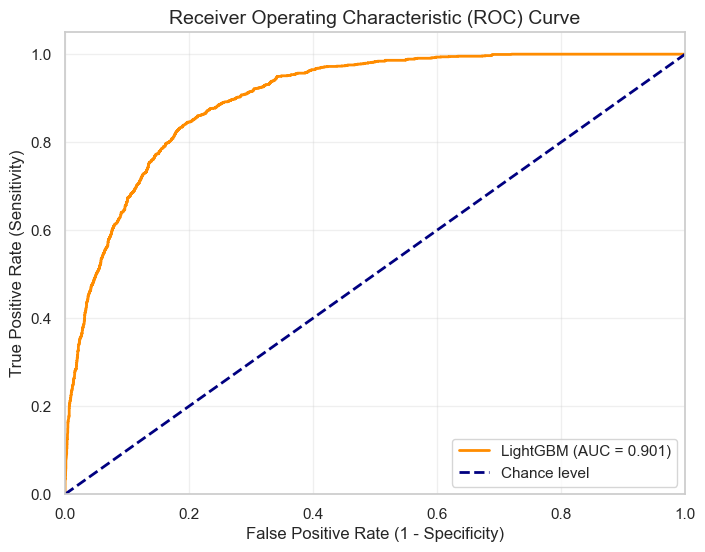

In [387]:
fpr, tpr, thresholds = roc_curve(y, y_prob_full, pos_label=1)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'LightGBM (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Chance level')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12)
plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=14)
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [404]:
df['Churn_Probability'] = y_prob_full
df['Churn_Model_Pred'] = y_pred_full

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_Prob,Churn_Probability,Churn_Model_Pred
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,False,False,False,False,False,False,True,0.401837,0.401837,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,True,False,False,False,False,False,False,0.075332,0.075332,0
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,0,...,False,False,False,False,True,False,False,0.231609,0.231609,0
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,1,...,False,True,False,False,False,False,True,0.332233,0.332233,0
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,1,...,True,False,False,False,False,True,False,0.095345,0.095345,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,1,...,True,False,False,False,False,False,False,0.408807,0.408807,0
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,False,True,False,True,False,False,False,0.023614,0.023614,0
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,...,False,False,True,False,False,False,True,0.024856,0.024856,0
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,True,False,True,False,True,False,False,0.021893,0.021893,0


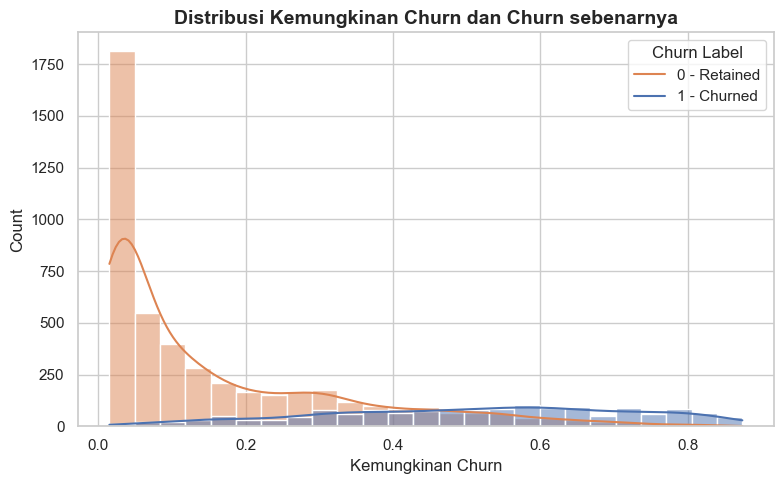

0.8741046601952145


In [409]:
plt.figure(figsize=(8, 5))
sns.histplot(
    data=df,
    x='Churn_Prob',
    hue='Churn Label',
    bins=25,
    kde=True)

plt.title('Distribusi Kemungkinan Churn dan Churn sebenarnya', fontsize=14, fontweight='bold')
plt.xlabel('Kemungkinan Churn', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Churn Label', labels=['0 - Retained', '1 - Churned'])
plt.tight_layout()
plt.show()

__Gained Profit from Model__

Karena Model memiliki Precision yang cukup baik (0.74), maka diputuskan untuk memberikan insentif sebesar 20% dari nilai Monthly Charges kepada pelanggan setia yang diprediksi Churn dari Model

Keuntungan yang diselamatkan berdasarkan ambang batas prediksi model
 Threshold  Incentivized_Customers  Precision  Total_Profit
      0.10                    1128      0.738      61770.73
      0.15                    1128      0.738      66497.77
      0.20                    1128      0.738      67261.37
      0.25                    1128      0.738      68006.37
      0.30                    1128      0.738      67895.25
      0.35                    1128      0.738      64303.39
      0.40                    1128      0.738      60288.76
      0.45                    1128      0.738      56315.19
      0.50                    1128      0.738      51218.70
      0.55                    1128      0.738      44679.31
      0.60                    1128      0.738      36535.34
      0.65                    1128      0.738      27638.13
      0.70                    1128      0.738      22248.71
      0.75                    1128      0.738      14714.07
      0.80                    1

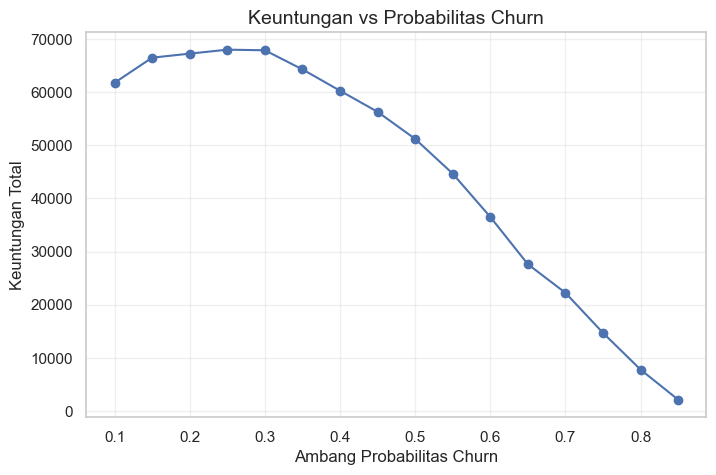

In [429]:
thresholds = np.arange(0.1, 0.9, 0.05)
profits = []
profit_summary = []

for t in thresholds:
    pred = (df['Churn_Prob'] >= t).astype(int)
    df['Outcome'] = np.select(
        [
            (pred == 1) & (df['Churn Value'] == 1),
            (pred == 1) & (df['Churn Value'] == 0),
            (pred == 0) & (df['Churn Value'] == 1),
            (pred == 0) & (df['Churn Value'] == 0)
        ],
        ['TP', 'FP', 'FN', 'TN']
    )
    df['Profit'] = np.select(
        [
            df['Outcome'] == 'TP',
            df['Outcome'] == 'FP',
            df['Outcome'] == 'FN',
            df['Outcome'] == 'TN'
        ],
        [
        0.8 * df['Monthly Charges'], #Monthly Charges yang diselamatkan - 20% Monthly Charges
        -0.2 * df['Monthly Charges'], # 20% Monthly Charges yang hilang pada pelanggan setia
        0, # Pelanggan yang Churn namun tidak terdeteksi model
        0 # Pelanggan setia yang tidak diberikan insentif
        ]
    )
    profits.append(df['Profit'].sum())

    total_profit = df['Profit'].sum()
    n_incentivized = (df['Churn_Model_Pred'] == 1).sum()
    precision = (
        df.loc[df['Churn_Model_Pred'] == 1, 'Churn Value'].mean()
        if n_incentivized > 0 else np.nan
    )

    profit_summary.append({
        'Threshold': t,
        'Incentivized_Customers': n_incentivized,
        'Precision': round(precision, 3),
        'Total_Profit': round(total_profit, 2)
    })

profit_df = pd.DataFrame(profit_summary)

print("Keuntungan yang diselamatkan berdasarkan ambang batas prediksi model")
print(profit_df.to_string(index=False))

plt.figure(figsize=(8, 5))
plt.plot(thresholds, profits, marker='o')
plt.title('Keuntungan vs Probabilitas Churn', fontsize=14)
plt.xlabel('Ambang Probabilitas Churn')
plt.ylabel('Keuntungan Total')
plt.grid(alpha=0.3)
plt.show()

__Nilai keuntungan akan maksimal jika probabilitas Churn di set >= 0.25__

In [427]:
df['Optimized_Churn_Pred'] = df['Churn_Probability'] > 0.25
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check,Churn_Prob,Churn_Probability,Churn_Model_Pred,Outcome,Profit,Optimized_Churn_Pred
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,1,...,False,False,False,True,0.401837,0.401837,0,FN,0.0,True
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,1,...,False,False,False,False,0.075332,0.075332,0,FN,0.0,False
5,4190-MFLUW,1,United States,California,Los Angeles,90020,"34.066367, -118.309868",34.066367,-118.309868,0,...,False,True,False,False,0.231609,0.231609,0,FN,0.0,False
7,1066-JKSGK,1,United States,California,Los Angeles,90024,"34.066303, -118.435479",34.066303,-118.435479,1,...,False,False,False,True,0.332233,0.332233,0,FN,0.0,True
8,6467-CHFZW,1,United States,California,Los Angeles,90028,"34.099869, -118.326843",34.099869,-118.326843,1,...,False,False,True,False,0.095345,0.095345,0,FN,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7036,8456-QDAVC,1,United States,California,Winterhaven,92283,"32.852947, -114.850784",32.852947,-114.850784,1,...,False,False,False,False,0.408807,0.408807,0,TN,0.0,True
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,0,...,True,False,False,False,0.023614,0.023614,0,TN,0.0,False
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,1,...,False,False,False,True,0.024856,0.024856,0,TN,0.0,False
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,0,...,False,True,False,False,0.021893,0.021893,0,TN,0.0,False


In [428]:
df.to_excel("Telco_Churn_with_Model.xlsx", index=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_12132\1370589268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


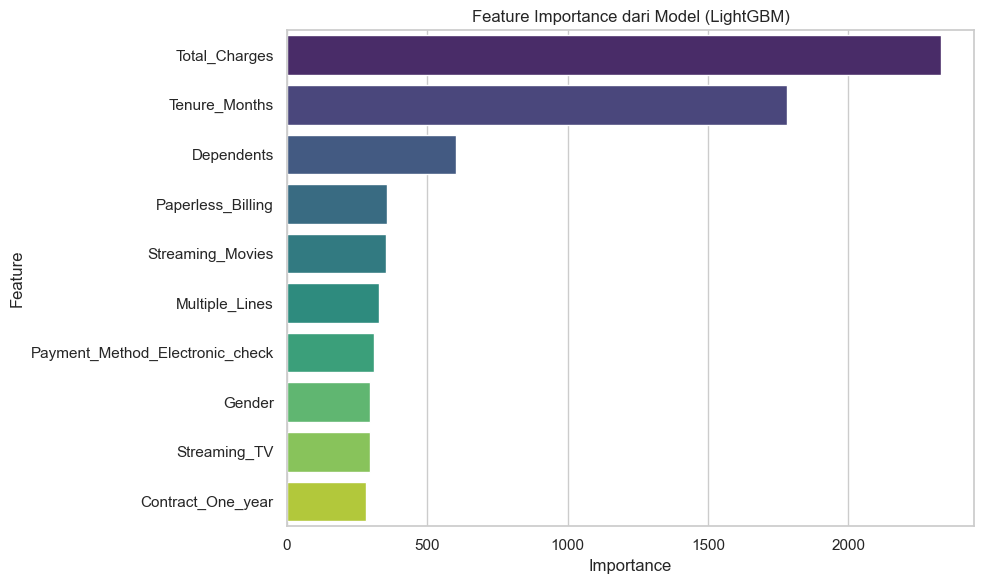

In [430]:
feature_importance = pd.DataFrame({
    'Feature': final_model.feature_name_,
    'Importance': final_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance.head(10),
    x='Importance',
    y='Feature',
    palette='viridis'
)
plt.title('Feature Importance dari Model (LightGBM)')
plt.tight_layout()
plt.show()

## Insight

Pelanggan mungkin sudah tertarik pada penawaran kompetitor, tetapi mereka terdorong untuk mengambil tindakan churn setelah mendapatkan pengalaman buruk dengan Support yang anda sediakan. Ketidakpuasan ini dapat memicu emosi yang mempercepat keputusan pelanggan untuk beralih. Selain itu, terdapat komplain mengenai kualitas service dan produk yang ditawarkan.

Dari Machine Learning yang dilakukan, didapatkan LightGBM merupakan model terbaik untuk klasifikasi dibandingkan yang lainnya. Setelah Hyperparameter Tuning, didapatkan presisi 0.74 dan recall 0.55 untuk memprediksi Churn dengan akurasi 0.84 dan AUC 0.90. Karena nilai presisi yang cukup baik, model ini dapat di jadikan acuan dimana pelanggan yang diprediksi Churn memiliki kemungkinan 74% akan Churn (Positive Predictive Value).

Karena presisi model yang cukup tinggi, maka diputuskan untuk membuat simulasi intervensi dari data yang ada dengan memberikan insentif sebanyak 20% dari Monthly Charges kepada seluruh subjek yang diprediksi Churn. Simulasi dilakukan dengan menghitung berapa banyak uang yang berpotensi diselamatkan berdasarkan probabilitas Churn per subjek dari model terbaik. Hasilnya, dengan pemberian insentif, pelanggan dengan probabilitas Churn >= 0.25, sebanyak USD 68.000 dapat diselamatkan

## Rekomendasi Model

- Menambah variabel-variabel baru yang berhubungan dengan frekuensi dan durasi penggunaan provider per bulan
- Membuat model prediksi potential loss dari Churn
- Membuat model prediksi gain dari intervensi yang dilakukan untuk mencegah Churn

## Rekomendasi Bisnis

- Melakukan evaluasi dan pelatihan kepada Support Personnel agar lebih berempati dan kompeten dalam memberikan solusi masalah pelanggan
- Memberikan diskon 20% kepada pelanggan yang kontrak Month-to-Month untuk meningkatkan retensi pelanggan
- Memberikan diskon 20% khusus pelanggan yang membayar dengan Electronic Check
- Mengubah user interface aplikasi pelanggan agar lebih mudah menghubungi Tech Support
- Memberikan diskon 20% kepada pelanggan yang menggunakan provider <12 bulan

